<a href="https://colab.research.google.com/github/vithushanms/makemore-language-model/blob/main/%5BLanguage_Models%5D_makemore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataFilePath = '/content/drive/My Drive/Publications/Neural Networks Research/makemore: next char prediction language model/names.txt'
words = open(dataFilePath, 'r').read().splitlines() 
len(words)

32033

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
#maximum charactor in the word
max(len(w) for w in words)

15

In [ ]:
#minnimum charactor in the word
min(len(w) for w in words)

2

In [ ]:
w = words [:1][0]
w[1:]

'mma'

In [ ]:
#get the high level idea of dataset by looking at the pattern
for w in words [:1]:
  for ch1, ch2 in zip(w, w[1:]):
    print(ch1, ch2)

e m
m m
m a


In [ ]:

d = {} #dictionary to maintain the count how many time same pattern occures
for w in words[:10]:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    d[bigram] = d.get(bigram, 0) + 1

In [ ]:
d

{('<S>', 'e'): 2,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 7,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 2,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 4,
 ('<S>', 'a'): 2,
 ('a', 'v'): 1,
 ('v', 'a'): 1,
 ('<S>', 'i'): 1,
 ('i', 's'): 1,
 ('s', 'a'): 1,
 ('a', 'b'): 1,
 ('b', 'e'): 1,
 ('e', 'l'): 3,
 ('l', 'l'): 1,
 ('l', 'a'): 1,
 ('<S>', 's'): 1,
 ('s', 'o'): 1,
 ('o', 'p'): 1,
 ('p', 'h'): 1,
 ('h', 'i'): 1,
 ('<S>', 'c'): 1,
 ('c', 'h'): 1,
 ('h', 'a'): 2,
 ('a', 'r'): 2,
 ('r', 'l'): 1,
 ('l', 'o'): 1,
 ('o', 't'): 1,
 ('t', 't'): 1,
 ('t', 'e'): 1,
 ('e', '<E>'): 1,
 ('<S>', 'm'): 1,
 ('m', 'i'): 1,
 ('a', 'm'): 1,
 ('m', 'e'): 1,
 ('<S>', 'h'): 1,
 ('r', 'p'): 1,
 ('p', 'e'): 1,
 ('e', 'r'): 1,
 ('r', '<E>'): 1,
 ('e', 'v'): 1,
 ('v', 'e'): 1,
 ('l', 'y'): 1,
 ('y', 'n'): 1,
 ('n', '<E>'): 1}

In [ ]:
sorted(d.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 7),
 (('i', 'a'), 4),
 (('e', 'l'), 3),
 (('<S>', 'e'), 2),
 (('l', 'i'), 2),
 (('<S>', 'a'), 2),
 (('h', 'a'), 2),
 (('a', 'r'), 2),
 (('e', 'm'), 1),
 (('m', 'm'), 1),
 (('m', 'a'), 1),
 (('<S>', 'o'), 1),
 (('o', 'l'), 1),
 (('i', 'v'), 1),
 (('v', 'i'), 1),
 (('a', 'v'), 1),
 (('v', 'a'), 1),
 (('<S>', 'i'), 1),
 (('i', 's'), 1),
 (('s', 'a'), 1),
 (('a', 'b'), 1),
 (('b', 'e'), 1),
 (('l', 'l'), 1),
 (('l', 'a'), 1),
 (('<S>', 's'), 1),
 (('s', 'o'), 1),
 (('o', 'p'), 1),
 (('p', 'h'), 1),
 (('h', 'i'), 1),
 (('<S>', 'c'), 1),
 (('c', 'h'), 1),
 (('r', 'l'), 1),
 (('l', 'o'), 1),
 (('o', 't'), 1),
 (('t', 't'), 1),
 (('t', 'e'), 1),
 (('e', '<E>'), 1),
 (('<S>', 'm'), 1),
 (('m', 'i'), 1),
 (('a', 'm'), 1),
 (('m', 'e'), 1),
 (('<S>', 'h'), 1),
 (('r', 'p'), 1),
 (('p', 'e'), 1),
 (('e', 'r'), 1),
 (('r', '<E>'), 1),
 (('e', 'v'), 1),
 (('v', 'e'), 1),
 (('l', 'y'), 1),
 (('y', 'n'), 1),
 (('n', '<E>'), 1)]

In [ ]:
import torch

In [ ]:
a = torch.zeros((3,5), dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
#array to store char
N = torch.zeros((28,28), dtype=torch.int32)

In [ ]:
chars = set(''.join(words))
chars

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [ ]:
stoi = { s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
itos = {i:s for s,i in stoi.items()}

In [ ]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

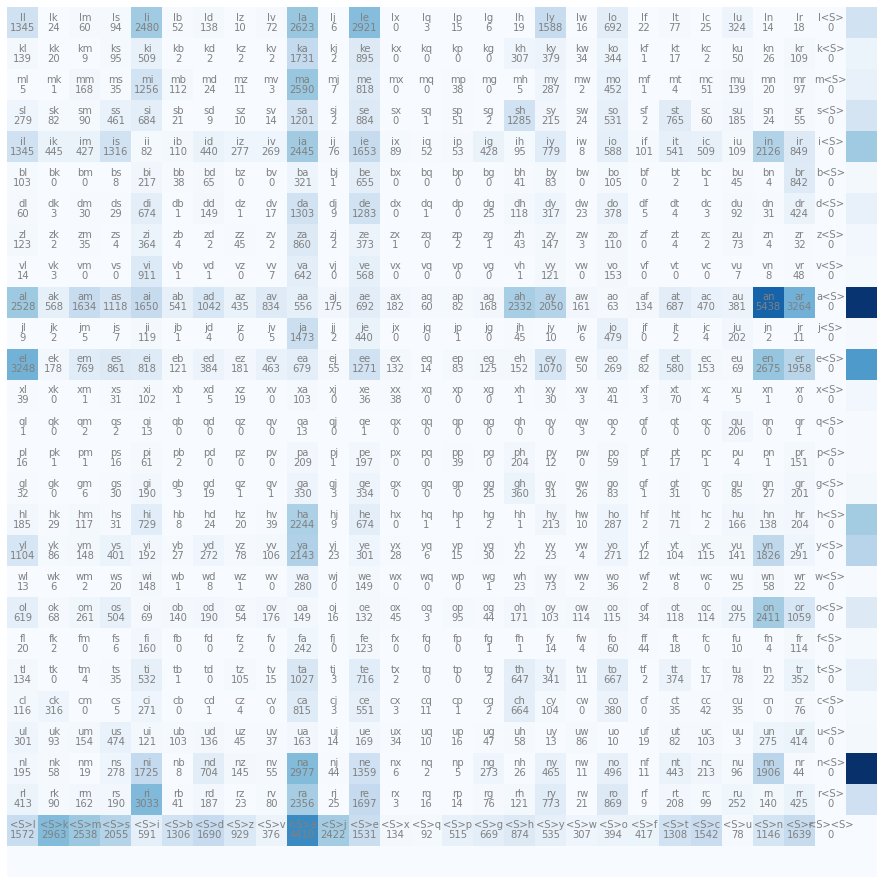

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');